In [1]:
import numpy as np
%matplotlib inline
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
amzn =yf.Ticker("AMZN")
amzn

yfinance.Ticker object <AMZN>

In [3]:
amzn.info

{'address1': '410 Terry Avenue North',
 'city': 'Seattle',
 'state': 'WA',
 'zip': '98109-5210',
 'country': 'United States',
 'phone': '206 266 1000',
 'website': 'https://www.aboutamazon.com',
 'industry': 'Internet Retail',
 'industryKey': 'internet-retail',
 'industryDisp': 'Internet Retail',
 'sector': 'Consumer Cyclical',
 'sectorKey': 'consumer-cyclical',
 'sectorDisp': 'Consumer Cyclical',
 'longBusinessSummary': "Amazon.com, Inc. engages in the retail sale of consumer products, advertising, and subscriptions service through online and physical stores in North America and internationally. The company operates through three segments: North America, International, and Amazon Web Services (AWS). It also manufactures and sells electronic devices, including Kindle, Fire tablets, Fire TVs, Echo, Ring, Blink, and eero; and develops and produces media content. In addition, the company offers programs that enable sellers to sell their products in its stores; and programs that allow auth

In [4]:
amzn_history = amzn.history(start="2021-01-01", end="2024-05-30")
amzn_history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-04 00:00:00-05:00,163.500000,163.600006,157.201004,159.331497,88228000,0.0,0.0
2021-01-05 00:00:00-05:00,158.300507,161.169006,158.253006,160.925507,53110000,0.0,0.0
2021-01-06 00:00:00-05:00,157.324005,159.875504,156.557999,156.919006,87896000,0.0,0.0
2021-01-07 00:00:00-05:00,157.850006,160.427002,157.750000,158.108002,70290000,0.0,0.0
2021-01-08 00:00:00-05:00,159.000000,159.531998,157.110001,159.134995,70754000,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-22 00:00:00-04:00,183.880005,185.220001,181.970001,183.130005,28148800,0.0,0.0
2024-05-23 00:00:00-04:00,183.660004,184.759995,180.080002,181.050003,33670200,0.0,0.0
2024-05-24 00:00:00-04:00,181.649994,182.440002,180.300003,180.750000,27434100,0.0,0.0


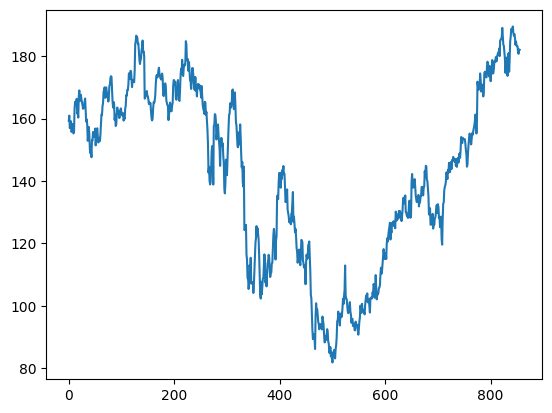

In [5]:
plt.plot(amzn_history[["Close"]].values)

In [6]:
from sklearn.preprocessing import MinMaxScaler

amzn_close = amzn_history[["Close"]].values.astype('float32')
amzn_open = amzn_history[["Open"]].values.astype('float32')
amzn_high = amzn_history[["High"]].values.astype('float32')
amzn_low = amzn_history[["Low"]].values.astype('float32')

# scaler1 = MinMaxScaler()
# scaler1.fit(amzn_close)
# amzn_close = scaler1.transform(amzn_close)
#
# scaler2 = MinMaxScaler()
# scaler2.fit(amzn_close)
# aapl_close = scaler2.transform(amzn_close)

In [7]:
print(np.sqrt(np.mean((amzn_open-amzn_close)**2)))

2.3571618


In [8]:
train_size = int(len(amzn_close) * 0.67)
test_size = len(amzn_close) - train_size
# train, test = amzn_close[:train_size], amzn_close[train_size:]
train, test = np.concatenate((amzn_close[:train_size], amzn_open[:train_size], amzn_high[:train_size], amzn_low[:train_size]), axis=1), np.concatenate((amzn_close[train_size:], amzn_open[train_size:], amzn_high[train_size:], amzn_low[train_size:]), axis=1)

In [9]:
train

array([[159.3315, 163.5   , 163.6   , 157.201 ],
       [160.9255, 158.3005, 161.169 , 158.253 ],
       [156.919 , 157.324 , 159.8755, 156.558 ],
       ...,
       [ 99.92  , 100.8   , 101.    ,  99.01  ],
       [ 97.83  , 100.4   , 100.51  ,  97.71  ],
       [102.4   ,  98.95  , 102.57  ,  98.71  ]], dtype=float32)

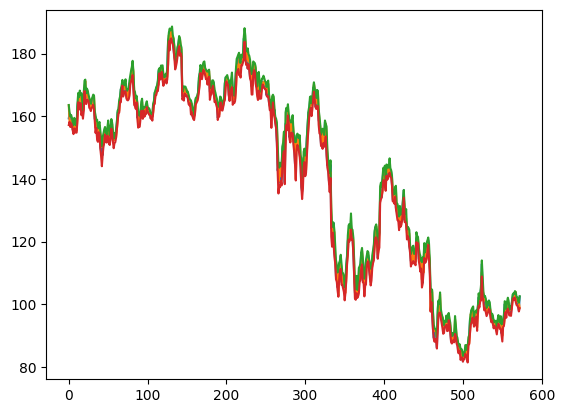

In [10]:
plt.plot(train)

In [11]:
test

array([[102.51, 102.07, 103.2 , 101.11],
       [102.74, 103.16, 103.73, 101.59],
       [102.3 , 103.95, 104.2 , 101.52],
       ...,
       [180.75, 181.65, 182.44, 180.3 ],
       [182.15, 179.93, 182.24, 179.49],
       [182.02, 181.7 , 184.08, 181.55]], dtype=float32)

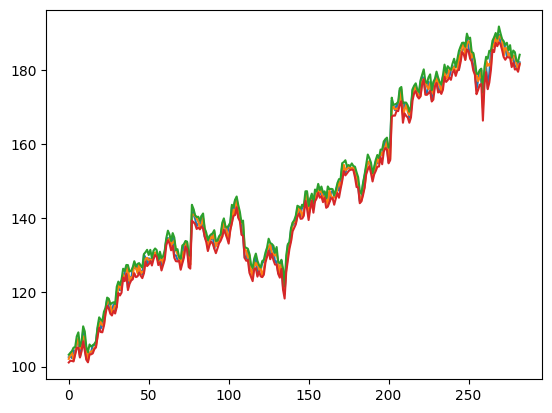

In [12]:
plt.plot(test)

In [13]:
import torch

def create_dataset(dataset, lookback):
    """Transform a time series into a prediction dataset

    Args:
        dataset: A numpy array of time series, first dimension is the time steps
        lookback: Size of window for prediction
    """
    X, y = [], []
    for i in range(len(dataset)-lookback):
        feature = dataset[i:i+lookback]
        target = dataset[i+1:i+lookback+1, [0]]
        X.append(feature)
        y.append(target)
    return torch.tensor(np.array(X)), torch.tensor(np.array(y))

In [14]:
lookback = 21
X_train, y_train = create_dataset(train, lookback=lookback)
X_test, y_test = create_dataset(test, lookback=lookback)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([552, 21, 4]) torch.Size([552, 21, 1])
torch.Size([262, 21, 4]) torch.Size([262, 21, 1])


In [ ]:
from model import ForecastModel
import torch.optim as optim
import torch.utils.data as data
import torch.nn as nn

device = "cuda" if torch.cuda.is_available() else "cpu"

model = ForecastModel()
model.cuda(device)


optimizer = optim.Adam(model.parameters(),lr=3e-4, weight_decay=0.0001)


loss_fn = nn.MSELoss()
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=8, pin_memory=True)

n_epochs = 2000
train_rmse_list = []
test_rmse_list = []

minimum_state_dict = None
minimum_rmse = None

for epoch in range(n_epochs):
    model.to(device)
    model.train()
    for X_batch, y_batch in loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Validation
    if epoch % 100 != 0:
        continue
    model.eval()
    with torch.no_grad():
        model.to("cpu")
        y_pred = model(X_train)
        train_rmse = np.sqrt(loss_fn(y_pred, y_train))
        train_rmse_list.append(train_rmse)
        y_pred = model(X_test)
        test_rmse = np.sqrt(loss_fn(y_pred, y_test))
        test_rmse_list.append(test_rmse)

        if minimum_rmse is None or test_rmse < minimum_rmse:
            minimum_rmse = test_rmse
            minimum_state_dict = model.state_dict()
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

print("minimum test_rmse: ", minimum_rmse)

Epoch 0: train RMSE 143.3245, test RMSE 147.4331
Epoch 100: train RMSE 6.9794, test RMSE 7.4882
Epoch 200: train RMSE 5.6483, test RMSE 5.7719


In [ ]:
plt.plot(np.log(np.array(train_rmse_list)))
plt.plot(np.log(np.array(test_rmse_list)))

In [ ]:
model.load_state_dict(minimum_state_dict)

model.to("cpu")
X_train, X_test = X_train.to("cpu"), X_test.to("cpu")
with torch.no_grad():
    # shift train predictions for plotting
    train_plot = np.ones_like(amzn_close) * np.nan
    y_pred = model(X_train)
    y_pred = y_pred[:, -1, :]
    train_plot[lookback:train_size] = model(X_train)[:, -1, :]
    # shift test predictions for plotting
    test_plot = np.ones_like(amzn_close) * np.nan
    test_plot[train_size+lookback:len(amzn_close)] = model(X_test)[:, -1, :]
# plot
plt.plot(amzn_close, c='b')
plt.plot(train_plot, c='r')
plt.plot(test_plot, c='g')

# plt.plot(scaler1.inverse_transform(amzn_close), c='b')
# plt.plot(scaler1.inverse_transform(train_plot), c='r')
# plt.plot(scaler1.inverse_transform(test_plot), c='g')
# plt.show()